In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [95]:
data = pd.read_csv(r'G:/GruV-Net/data/assembled_instances/GruVXtreme/2009-02-02_2017-12-25_all-stations_52w_offset4_Regnie-AirTemp-UTMCoord-Bounds_GwLvl_raster11_mean.csv', index_col=0)
data['Date'] = pd.to_datetime(data['Date'])
data.drop('UTMNorthing', 1, inplace=True)
data.drop('UTMEasting', 1, inplace=True)
data = data.iloc[:,:9]

In [53]:
data

,Date,Station,XtremeClass,XtremeBound0.05,XtremeBound0.95,XtremeBound0.5,Regnie0,DWDAirTemp0,GwLvlChange0
0,2009-02-02,HE_9523,0.0,-0.7205,0.74725,0.00,14.355373,44.165291,NaN
1,2009-02-02,HE_10223,0.0,-0.3105,0.30400,0.00,15.696871,43.115704,NaN
2,2009-02-02,HE_8872,0.0,-0.5480,0.58800,0.00,13.949748,41.950413,NaN
3,2009-02-02,HE_10225,-1.0,-0.7515,0.63075,0.00,15.176651,44.322315,NaN
4,2009-02-02,HE_9482,0.0,-0.7300,0.68000,0.00,10.022560,45.388432,NaN
...,...,...,...,...,...,...,...,...,...
152980,2017-12-25,HE_8999,NaN,-2.0900,2.14000,0.02,1.721236,4.975206,0.625
152981,2017-12-25,HE_8957,NaN,-2.4210,2.64525,-0.08,1.801329,8.239670,0.475
152982,2017-12-25,HE_6362,NaN,-0.1200,0.11550,0.00,2.650348,15.347108,0.010
152983,2017-12-25,HE_15651,NaN,-1.2740,1.30000,-0.02,0.997533,17.504131,0.225


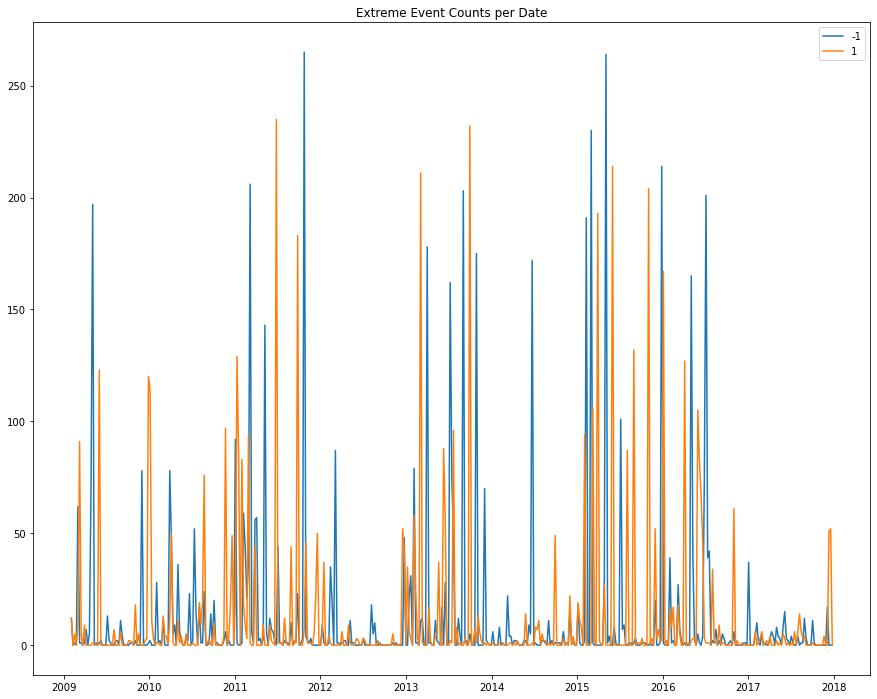

In [71]:
xtreme_counts = pd.get_dummies(data[['Date', 'XtremeClass']], columns=['XtremeClass']).groupby('Date').sum()

plt.figure(figsize=(15,12))
plt.plot(xtreme_counts[['XtremeClass_-1.0', 'XtremeClass_1.0']])
plt.legend(['-1', '1'])
plt.title('Extreme Event Counts per Date')
plt.show()

Text(0.5, 1.0, 'Precipitation Mean Max and Min')

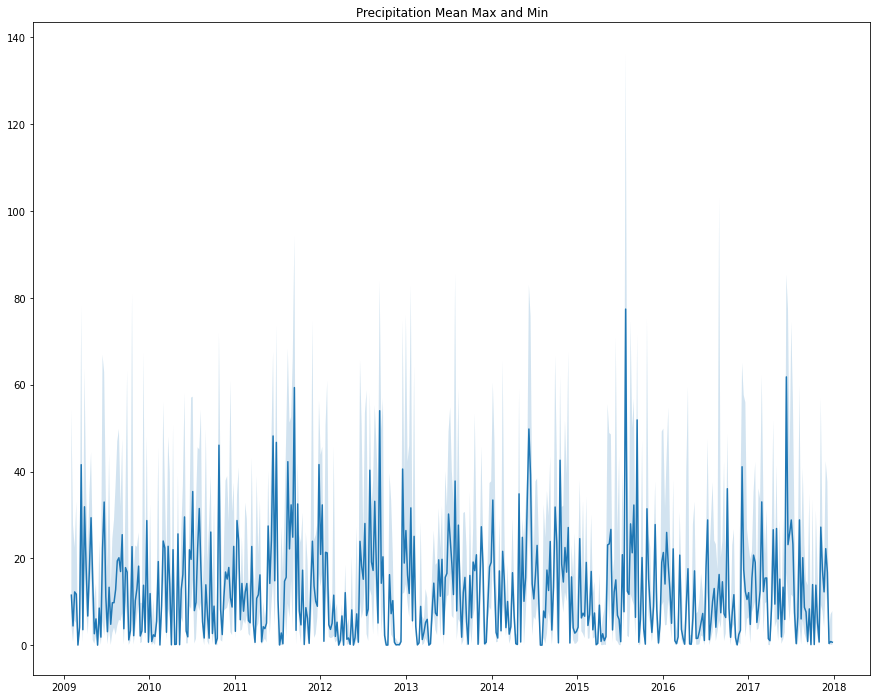

In [72]:
plt.figure(figsize=(15,12))
prc = data[['Date', 'Regnie0']].groupby('Date')
plt.plot(prc.mean())
plt.fill_between(prc.mean().index, prc.min()['Regnie0'], prc.max()['Regnie0'],alpha=.2)
plt.title('Precipitation Mean Max and Min')

Text(0.5, 1.0, 'Temperature Mean Max and Min')

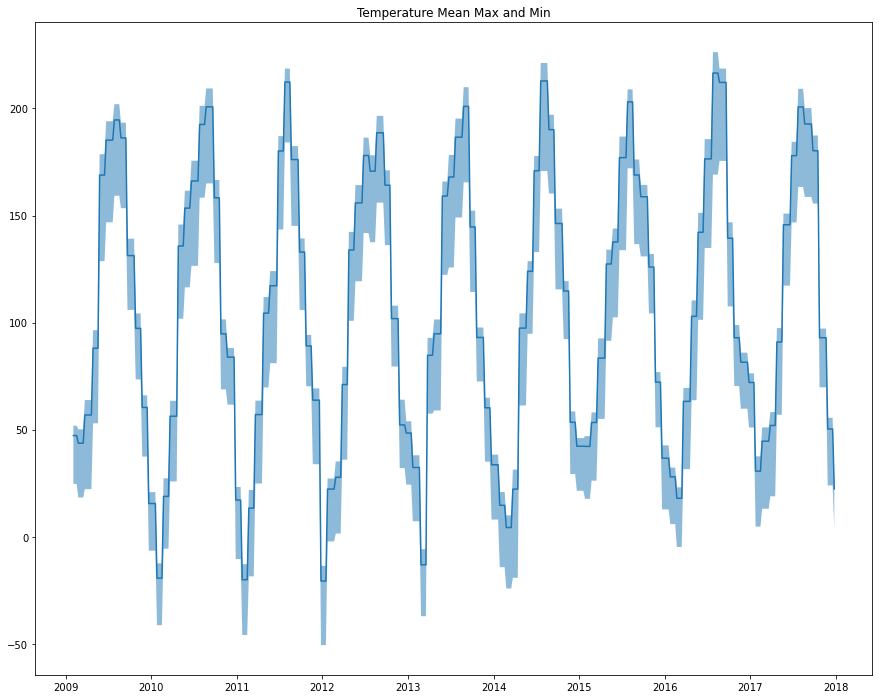

In [73]:
plt.figure(figsize=(15,12))
temp = data[['Date', 'DWDAirTemp0']].groupby('Date')
plt.plot(temp.mean())
plt.fill_between(temp.mean().index, temp.min()['DWDAirTemp0'], temp.max()['DWDAirTemp0'],alpha=.5)
plt.title('Temperature Mean Max and Min')

Text(0.5, 1.0, 'Groundwater Level Change Median Max and Min')

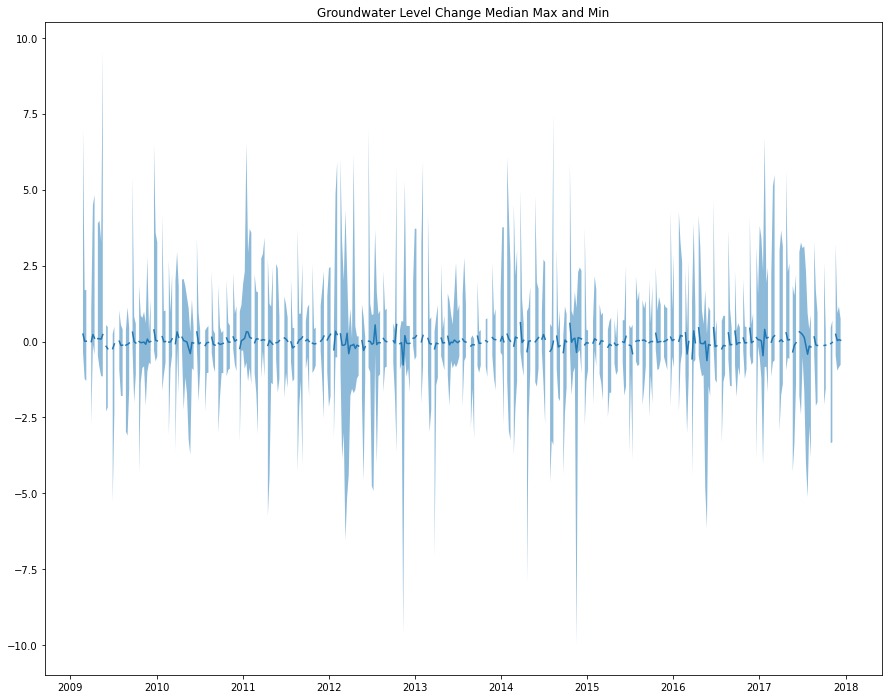

In [96]:
plt.figure(figsize=(15,12))
gw = data[['Date', 'GwLvlChange0']].groupby('Date')
#plt.plot(gw.mean())
plt.plot(gw.median())
plt.fill_between(gw.mean().index, gw.min()['GwLvlChange0'], gw.max()['GwLvlChange0'],alpha=.5)
plt.title('Groundwater Level Change Median Max and Min')

---

In [75]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit

In [97]:
data = pd.read_csv(r'G:/GruV-Net/data/assembled_instances/GruVXtreme/2009-02-02_2017-12-25_all-stations_52w_offset4_Regnie-AirTemp-UTMCoord-Bounds_GwLvl_raster11_mean.csv', index_col=0)
drop = data.dropna(subset=['XtremeClass'])
drop = drop.fillna(0)
X = drop.iloc[:,3:]
y = drop.iloc[:,2]

### Split bei dem es gut funktioniert

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
X_train.describe()

,UTMEasting,UTMNorthing,XtremeBound0.05,XtremeBound0.95,XtremeBound0.5,Regnie0,DWDAirTemp0,GwLvlChange0,Regnie1,DWDAirTemp1,...,GwLvlChange48,Regnie49,DWDAirTemp49,GwLvlChange49,Regnie50,DWDAirTemp50,GwLvlChange50,Regnie51,DWDAirTemp51,GwLvlChange51
count,70791.000000,7.079100e+04,70791.000000,70791.000000,70791.000000,70791.000000,70791.000000,70791.000000,70791.000000,70791.000000,...,70791.000000,70791.000000,70791.000000,70791.000000,70791.000000,70791.000000,70791.000000,70791.000000,70791.000000,70791.000000
mean,471557.756240,5.534524e+06,-0.538697,0.540900,-0.005514,12.326699,105.517635,0.016115,12.163438,105.448034,...,0.012894,12.204832,104.912697,0.008989,12.573666,105.048689,0.007997,12.968371,105.160404,0.004836
std,17782.322315,3.862320e+04,0.515383,0.498431,0.012645,12.450966,65.733173,0.358183,12.678477,65.837683,...,0.361120,13.117002,67.347926,0.388085,12.977239,67.151060,0.389249,13.559750,66.987510,0.388220
min,428194.000000,5.487354e+06,-4.573500,0.096000,-0.080000,0.000000,-45.801651,-10.000000,0.000000,-45.801651,...,-10.000000,0.000000,-50.520660,-10.000000,0.000000,-50.520660,-10.000000,0.000000,-50.520660,-9.630000
25%,460461.000000,5.503088e+06,-0.636000,0.263000,-0.010000,2.726677,50.719009,-0.050000,2.319142,50.495869,...,-0.045000,1.926393,49.272728,-0.050000,2.217830,49.900826,-0.080000,2.450466,51.454544,-0.090000
50%,467698.000000,5.528188e+06,-0.366000,0.390000,0.000000,9.039288,97.793388,0.000000,8.618674,97.867767,...,0.000000,8.313783,99.338844,0.000000,9.220407,99.347107,0.000000,8.989080,99.413223,0.000000
75%,478333.000000,5.550149e+06,-0.266000,0.640000,0.000000,18.116142,166.024796,0.050000,18.097200,166.495872,...,0.050000,18.322698,164.454544,0.060000,18.659101,164.342972,0.080000,19.175918,163.636368,0.090000
max,543298.000000,5.682746e+06,-0.110000,4.842500,0.020000,103.222740,226.247940,9.530000,130.802841,226.247940,...,7.483333,130.210007,226.247940,7.483333,136.605789,226.247940,7.030000,136.605789,226.247940,6.700000


In [80]:
X_test.describe()

,UTMEasting,UTMNorthing,XtremeBound0.05,XtremeBound0.95,XtremeBound0.5,Regnie0,DWDAirTemp0,GwLvlChange0,Regnie1,DWDAirTemp1,...,GwLvlChange48,Regnie49,DWDAirTemp49,GwLvlChange49,Regnie50,DWDAirTemp50,GwLvlChange50,Regnie51,DWDAirTemp51,GwLvlChange51
count,34868.000000,3.486800e+04,34868.000000,34868.000000,34868.000000,34868.000000,34868.000000,34868.000000,34868.000000,34868.000000,...,34868.000000,34868.000000,34868.000000,34868.000000,34868.000000,34868.000000,34868.000000,34868.000000,34868.000000,34868.000000
mean,471451.140215,5.534474e+06,-0.538489,0.540282,-0.005513,12.232552,105.786323,0.018709,12.083443,105.825468,...,0.012390,12.131566,105.191146,0.011684,12.633156,105.263901,0.010987,12.912162,105.549577,0.001554
std,17767.557950,3.880880e+04,0.518344,0.500023,0.012649,12.304632,65.766610,0.358340,12.605845,65.741591,...,0.352652,13.182576,67.396458,0.399403,12.997405,67.320076,0.389478,13.448828,67.041270,0.393036
min,428194.000000,5.487354e+06,-4.573500,0.096000,-0.080000,0.000000,-45.801651,-9.630000,0.000000,-45.801651,...,-9.630000,0.000000,-50.520660,-9.630000,0.000000,-50.520660,-6.550000,0.000000,-50.520660,-6.550000
25%,460271.000000,5.502947e+06,-0.636000,0.263000,-0.010000,2.668295,50.698348,-0.040000,2.295160,50.766530,...,-0.045000,1.906294,49.471073,-0.050000,2.301164,49.983471,-0.080000,2.481607,51.619835,-0.090000
50%,467668.000000,5.528156e+06,-0.365000,0.390000,0.000000,8.911164,98.574383,0.000000,8.629416,98.785126,...,0.000000,8.184241,99.231403,0.000000,9.368737,99.297523,0.000000,9.000492,99.619835,0.000000
75%,478333.000000,5.550149e+06,-0.268600,0.640000,0.000000,18.158020,165.985538,0.050000,17.957313,165.551655,...,0.050000,18.160642,164.925613,0.060000,18.728302,164.991730,0.080000,19.051670,163.950409,0.090000
max,543298.000000,5.682746e+06,-0.110000,4.842500,0.020000,88.889015,225.743805,8.190000,136.605789,225.743805,...,6.240000,136.605789,226.247940,6.700000,130.210007,226.247940,6.060000,125.809753,226.247940,7.483333


In [82]:
y_train.value_counts()

 0.0    63305
-1.0     3859
 1.0     3627
Name: XtremeClass, dtype: int64

In [83]:
y_test.value_counts()

 0.0    31188
 1.0     1842
-1.0     1838
Name: XtremeClass, dtype: int64

### Split bei dem es nicht funktioniert

In [86]:
for train_idx, test_idx in TimeSeriesSplit(5).split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [88]:
X_train.describe()

,UTMEasting,UTMNorthing,XtremeBound0.05,XtremeBound0.95,XtremeBound0.5,Regnie0,DWDAirTemp0,GwLvlChange0,Regnie1,DWDAirTemp1,...,GwLvlChange48,Regnie49,DWDAirTemp49,GwLvlChange49,Regnie50,DWDAirTemp50,GwLvlChange50,Regnie51,DWDAirTemp51,GwLvlChange51
count,88050.000000,8.805000e+04,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,...,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000,88050.000000
mean,471664.734162,5.534928e+06,-0.541937,0.544282,-0.005607,12.214485,101.595843,0.016281,12.447098,101.916035,...,0.014416,12.100941,101.873392,0.013649,12.458687,102.083116,0.013924,12.892654,102.433594,0.005446
std,17869.403287,3.898621e+04,0.521965,0.504398,0.012738,12.400475,65.498623,0.357178,12.875425,65.472839,...,0.366830,12.930940,66.667044,0.399858,12.620776,66.401725,0.398250,13.276913,66.101363,0.400264
min,428194.000000,5.487354e+06,-4.573500,0.096000,-0.080000,0.000000,-45.801651,-10.000000,0.000000,-45.801651,...,-10.000000,0.000000,-50.520660,-10.000000,0.000000,-50.520660,-10.000000,0.000000,-50.520660,-9.630000
25%,460461.000000,5.503088e+06,-0.638500,0.263000,-0.010000,2.554850,46.520660,-0.040000,2.346306,46.760330,...,-0.040000,1.974852,45.340910,-0.050000,2.310417,45.851238,-0.080000,2.560181,48.024792,-0.100000
50%,467718.000000,5.528188e+06,-0.366000,0.390000,0.000000,8.740685,97.000000,0.000000,8.939466,97.595039,...,0.000000,8.272938,96.838840,0.000000,9.316713,96.900826,0.000000,9.136809,97.123970,0.000000
75%,478574.000000,5.551518e+06,-0.268600,0.640000,0.000000,18.298018,162.500004,0.050000,18.626852,162.512390,...,0.050000,18.134011,162.743805,0.065000,18.548823,162.692146,0.090000,18.978312,161.801651,0.095000
max,543298.000000,5.682746e+06,-0.110000,4.842500,0.020000,94.325478,221.206604,9.530000,136.605789,221.206604,...,7.483333,136.605789,226.247940,7.483333,136.605789,226.247940,7.030000,136.605789,226.247940,7.483333


In [90]:
X_test.describe()

,UTMEasting,UTMNorthing,XtremeBound0.05,XtremeBound0.95,XtremeBound0.5,Regnie0,DWDAirTemp0,GwLvlChange0,Regnie1,DWDAirTemp1,...,GwLvlChange48,Regnie49,DWDAirTemp49,GwLvlChange49,Regnie50,DWDAirTemp50,GwLvlChange50,Regnie51,DWDAirTemp51,GwLvlChange51
count,17609.000000,1.760900e+04,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,...,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000,17609.000000
mean,470811.723323,5.532406e+06,-0.522083,0.522765,-0.005044,12.701381,125.659744,0.020419,10.586657,123.856400,...,0.004287,12.579242,120.661449,-0.008978,13.266389,120.303542,-0.015722,13.235675,119.565834,-0.004711
std,17293.230195,3.706800e+04,0.487041,0.470396,0.012168,12.407331,63.253293,0.363462,11.360664,64.406059,...,0.312359,14.125237,68.636032,0.348506,14.647024,69.123725,0.340151,14.690016,69.619871,0.332578
min,428194.000000,5.487354e+06,-4.573500,0.096000,-0.080000,0.000000,0.000000,-4.010000,0.000000,0.000000,...,-4.290000,0.000000,-36.768597,-5.130000,0.000000,-36.768597,-5.130000,0.000000,-36.768597,-5.130000
25%,460151.000000,5.502918e+06,-0.594000,0.258000,-0.010000,3.770721,72.314049,-0.070000,2.144135,66.942146,...,-0.050000,1.452048,69.628098,-0.060000,1.746697,61.264462,-0.070000,1.979285,60.066116,-0.080000
50%,467598.000000,5.528018e+06,-0.356000,0.380000,0.000000,10.003651,138.826447,0.000000,7.351964,126.247932,...,0.000000,8.248714,138.305786,0.000000,9.059855,138.115707,0.000000,8.185227,138.041321,0.000000
75%,475205.000000,5.542402e+06,-0.265000,0.622000,0.000000,17.429974,183.322311,0.060000,15.244609,183.322311,...,0.040000,18.933071,183.289261,0.040000,19.496347,183.380173,0.050000,19.998392,183.867767,0.060000
max,543298.000000,5.682746e+06,-0.110000,4.842500,0.020000,103.222740,226.247940,5.480000,85.398911,226.247940,...,5.115000,93.219688,209.140503,5.115000,90.609924,209.140503,3.880000,93.219688,209.140503,3.880000


In [92]:
y_train.value_counts()

 0.0    77954
-1.0     5134
 1.0     4962
Name: XtremeClass, dtype: int64

In [93]:
y_test.value_counts()

 0.0    16539
-1.0      563
 1.0      507
Name: XtremeClass, dtype: int64